<a href="https://colab.research.google.com/github/Bwatna/-Bwatna-ML-Assessment/blob/main/ML_Assessment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Car Insurance Claim Prediction Assessment

**Objectives**

AutoInland wants to proactively anticipate which customers are likely to file a vehicle insurance claim in the next three months. Because customer contact is limited, predicting claim likelihood early allows the company to allocate resources, manage risk, and improve service levels.

***Import Libraries***

In [ ]:
import warnings
warnings.filterwarnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report, roc_curve)

### Load data

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("ML Assessment.csv")
df.head()


Saving ML Assessment.csv to ML Assessment (6).csv


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


### Quick Inspection
confirms file loaded correctly and identifies target/ID columns.

In [ ]:
df.shape

(10000, 19)

In [ ]:
df.info()
#print("Columns:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  int64  
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  int64  
 11  CHILDREN             10000 non-null  int64  
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

gives a quick sense of distributions and types.

### Data Cleaning

In [ ]:
# Check missing values
print(df.isnull().sum())

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64


In [ ]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [ ]:
# Missing values summary
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.concat([missing, missing_pct], axis=1)
missing_df.columns = ['missing_count', 'missing_percent']
missing_df.head(20)

,missing_count,missing_percent
CREDIT_SCORE,982,9.82
ANNUAL_MILEAGE,957,9.57
ID,0,0.00
GENDER,0,0.00
AGE,0,0.00
EDUCATION,0,0.00
RACE,0,0.00
INCOME,0,0.00
VEHICLE_OWNERSHIP,0,0.00
VEHICLE_YEAR,0,0.00


In [ ]:
df.duplicated().sum()

np.int64(0)

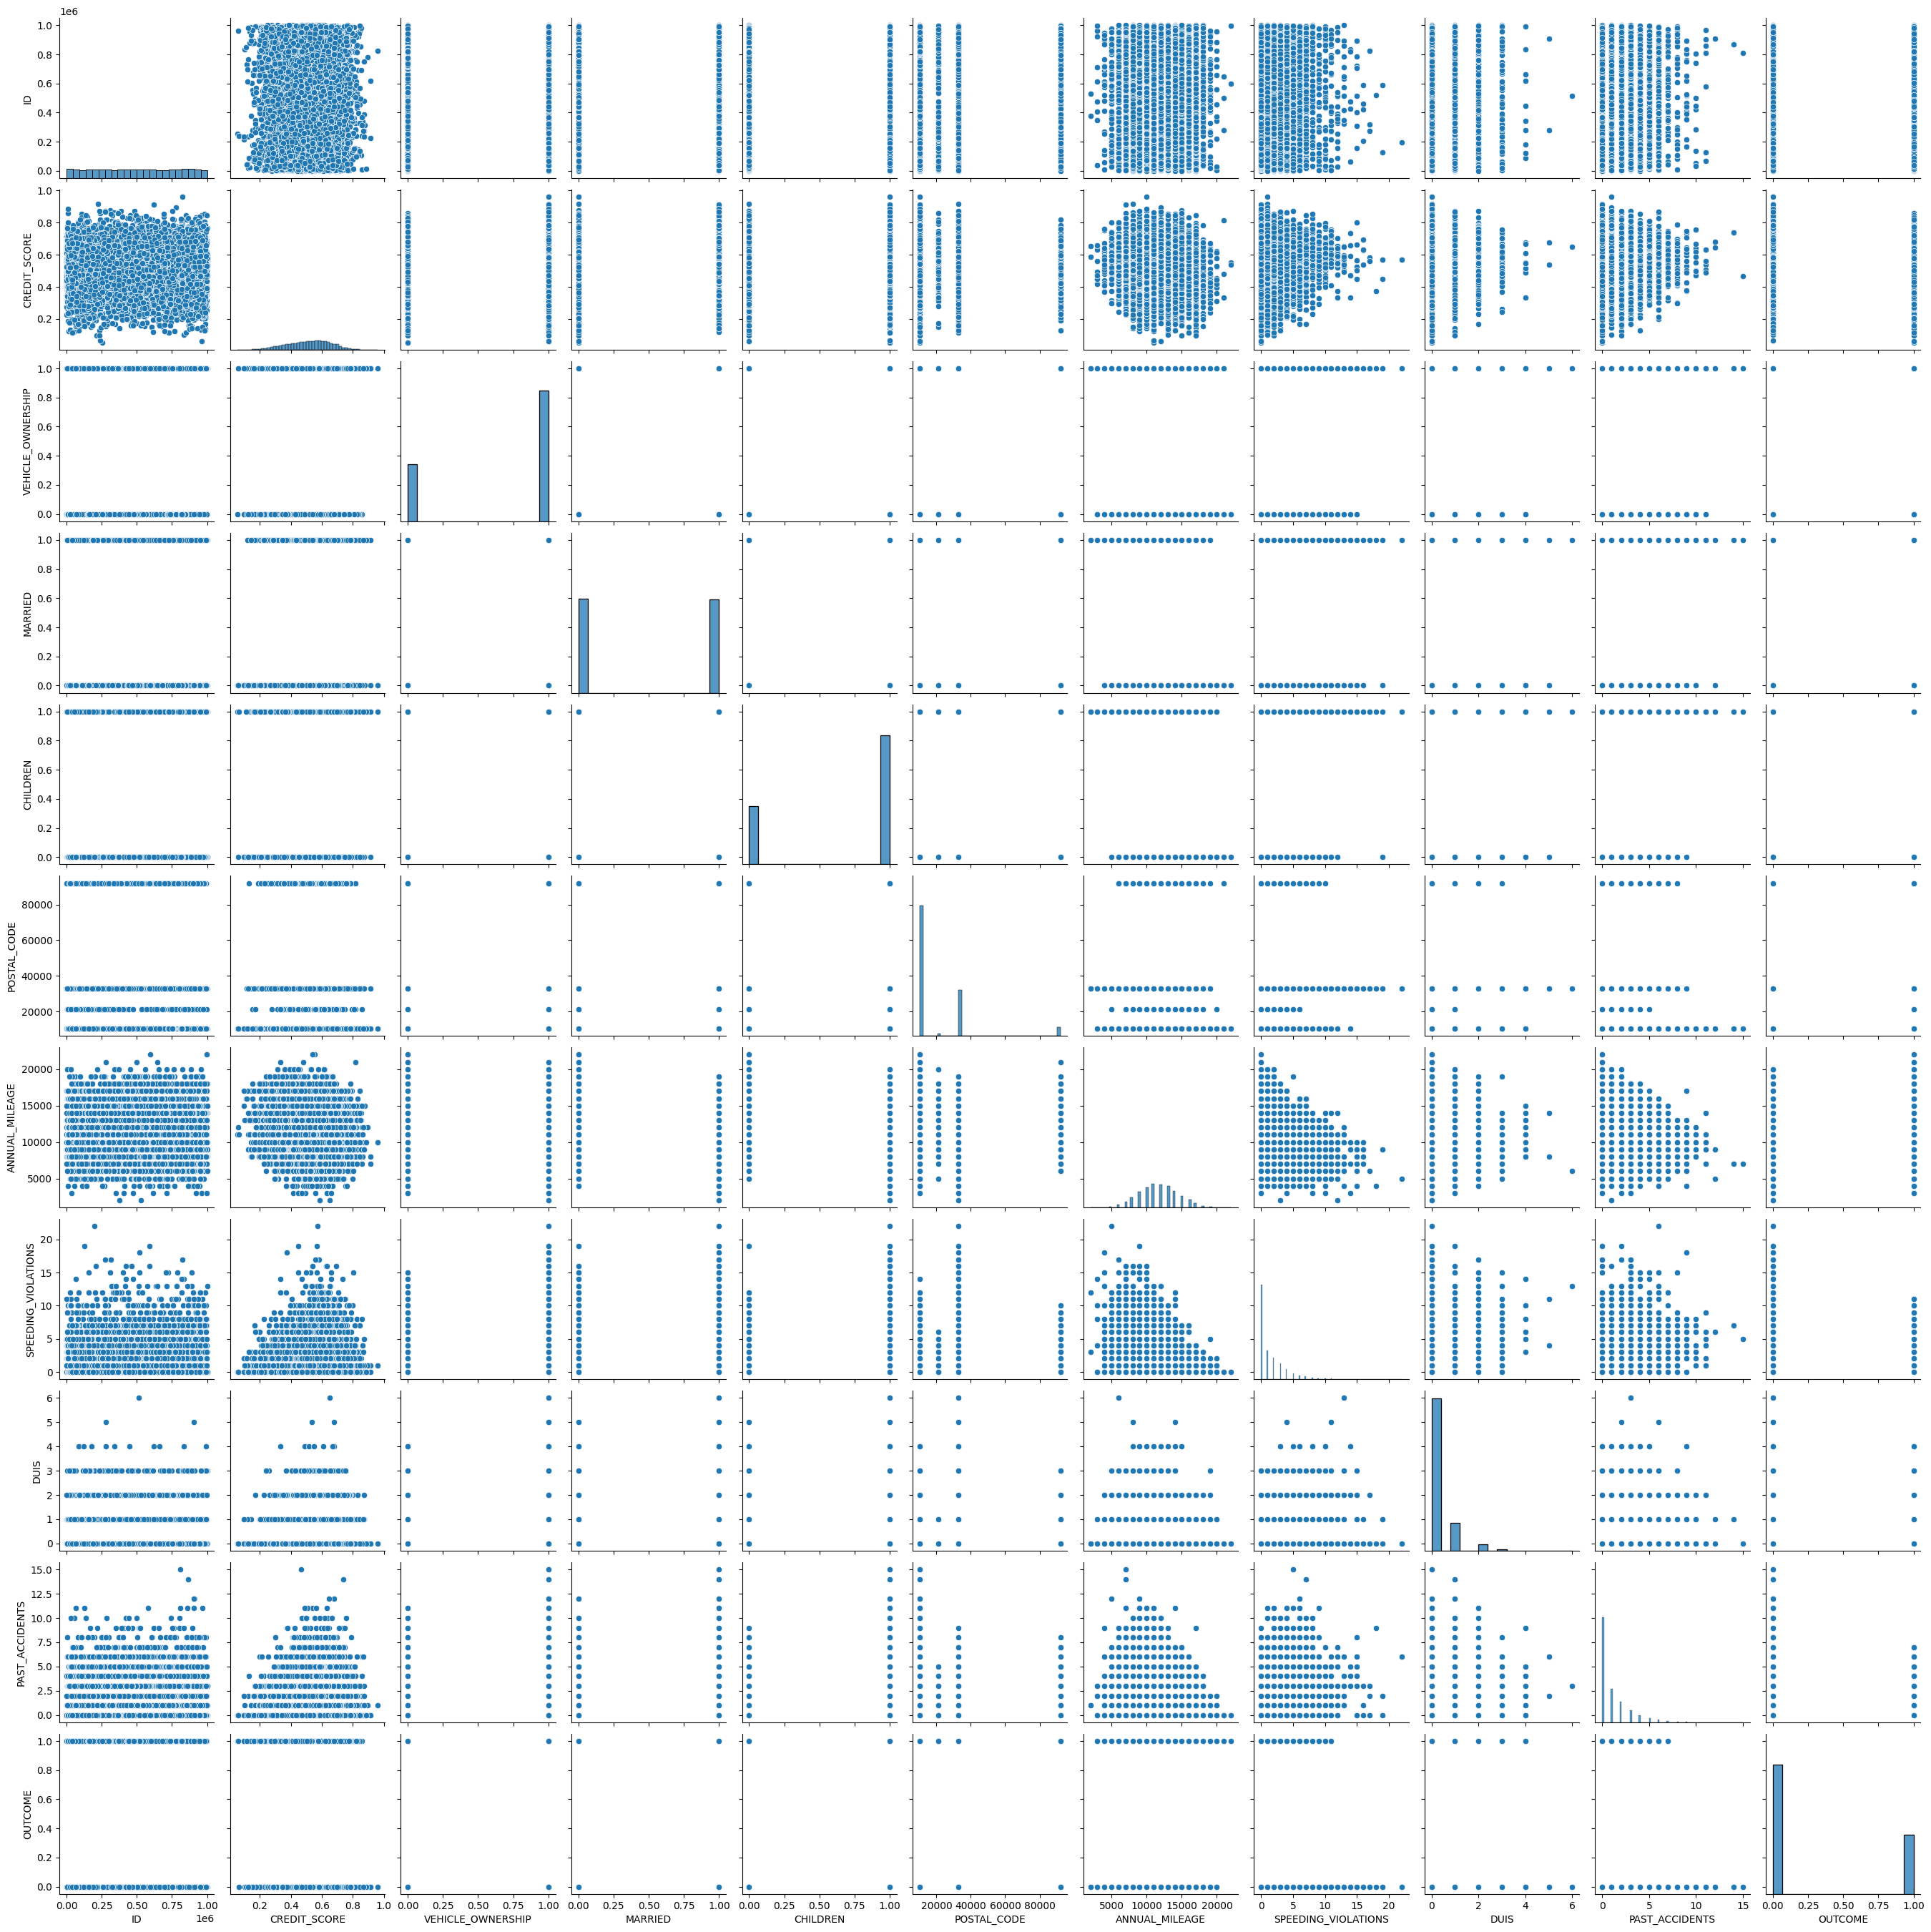

In [ ]:
sns.pairplot(df)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
ID,0
AGE,0
GENDER,0
RACE,0
DRIVING_EXPERIENCE,0
EDUCATION,0
INCOME,0
CREDIT_SCORE,0
VEHICLE_OWNERSHIP,0
VEHICLE_YEAR,0


In [ ]:
print(df.info())
#print("Columns:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8149 non-null   int64  
 1   AGE                  8149 non-null   object 
 2   GENDER               8149 non-null   object 
 3   RACE                 8149 non-null   object 
 4   DRIVING_EXPERIENCE   8149 non-null   object 
 5   EDUCATION            8149 non-null   object 
 6   INCOME               8149 non-null   object 
 7   CREDIT_SCORE         8149 non-null   float64
 8   VEHICLE_OWNERSHIP    8149 non-null   int64  
 9   VEHICLE_YEAR         8149 non-null   object 
 10  MARRIED              8149 non-null   int64  
 11  CHILDREN             8149 non-null   int64  
 12  POSTAL_CODE          8149 non-null   int64  
 13  ANNUAL_MILEAGE       8149 non-null   float64
 14  VEHICLE_TYPE         8149 non-null   object 
 15  SPEEDING_VIOLATIONS  8149 non-null   int64 

#### Exploratory Data Analysis (EDA)

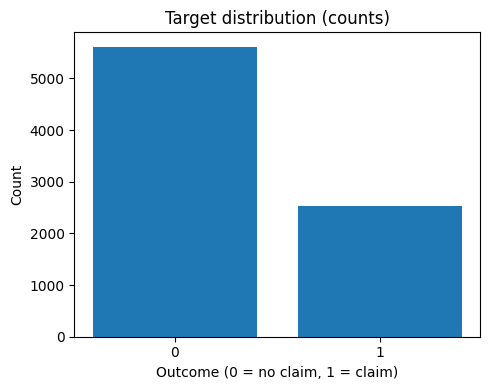


--- Outcome Distribution ---
OUTCOME
0    5613
1    2536
Name: count, dtype: int64
Percentage of claims (1): 31.12%
Percentage of no claims (0): 68.88%


In [ ]:
# target distribution bar plot (matplotlib)
counts = df['OUTCOME'].value_counts().sort_index()
plt.figure(figsize=(5,4))
plt.bar([str(i) for i in counts.index], counts.values)
plt.title("Target distribution (counts)")
plt.xlabel("Outcome (0 = no claim, 1 = claim)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Check the distribution of the target variable 'OUTCOME'
outcome_counts = df['OUTCOME'].value_counts()
print("\n--- Outcome Distribution ---")
print(outcome_counts)
print(f"Percentage of claims (1): {outcome_counts[1] / len(df) * 100:.2f}%")
print(f"Percentage of no claims (0): {outcome_counts[0] / len(df) * 100:.2f}%")



The target variable is imbalanced, with significantly more "No Claim" outcomes.

In [ ]:
categorical_cols = {
    'AGE': df.AGE.unique(),
    'RACE':df.RACE.unique(),
    'GENDER': df.GENDER.unique(),
    'DRIVING_EXPERIENCE': df.DRIVING_EXPERIENCE.unique(),
    'EDUCATION': df.EDUCATION.unique(),
    'INCOME': df.INCOME.unique(),
    'VEHICLE_OWNERSHIP': df.VEHICLE_OWNERSHIP.unique()
    }

categorical_cols

{'AGE': array(['65+', '16-25', '26-39', '40-64'], dtype=object),
 'RACE': array(['majority', 'minority'], dtype=object),
 'GENDER': array(['female', 'male'], dtype=object),
 'DRIVING_EXPERIENCE': array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object),
 'EDUCATION': array(['high school', 'none', 'university'], dtype=object),
 'INCOME': array(['upper class', 'poverty', 'working class', 'middle class'],
       dtype=object),
 'VEHICLE_OWNERSHIP': array([1, 0])}

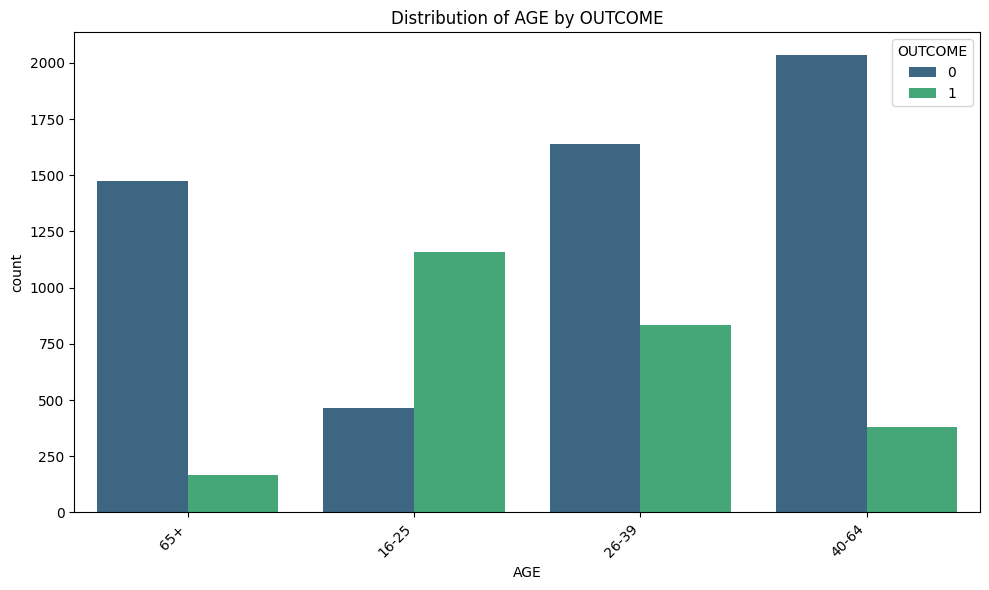

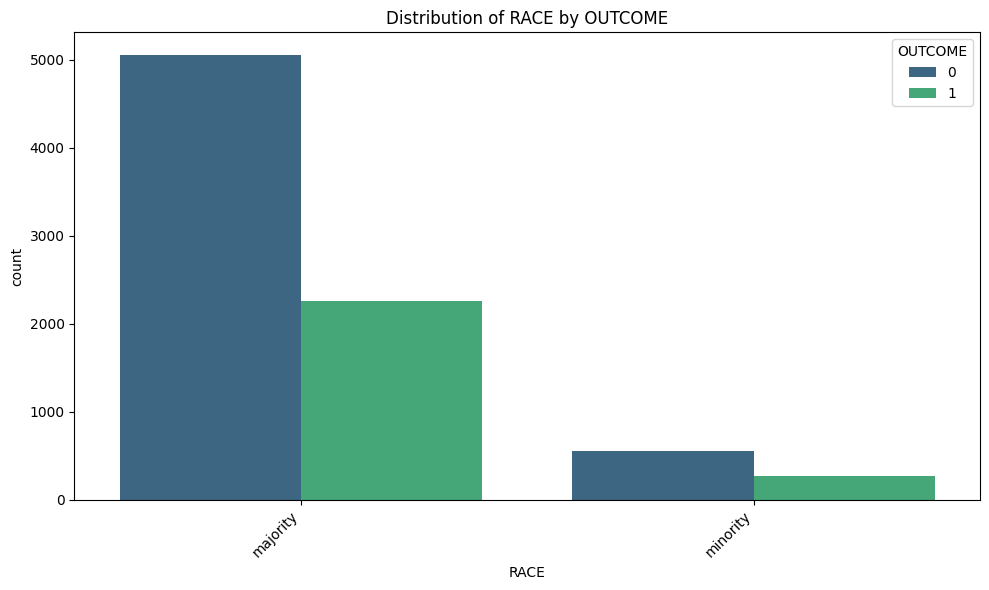

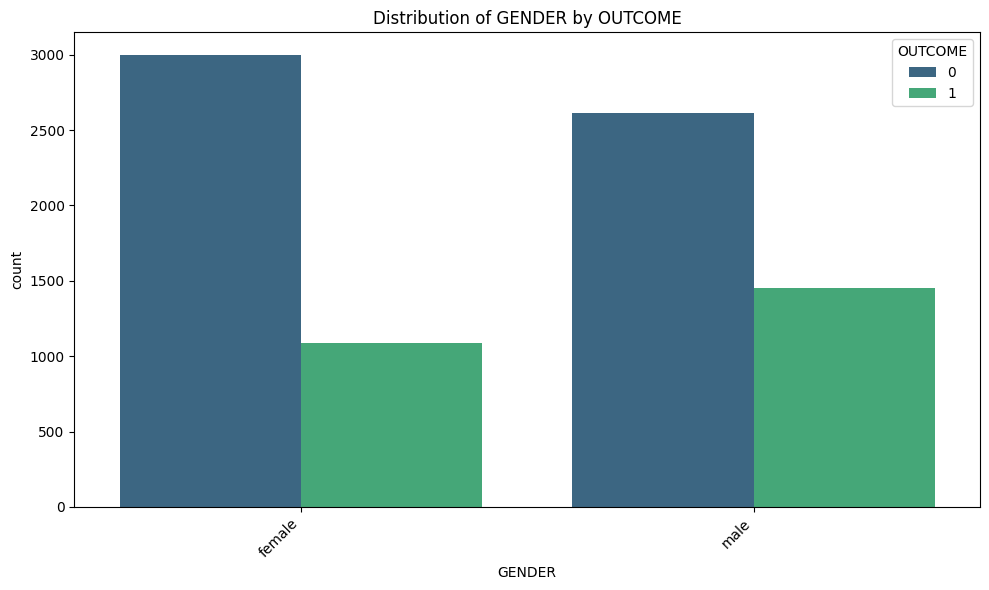

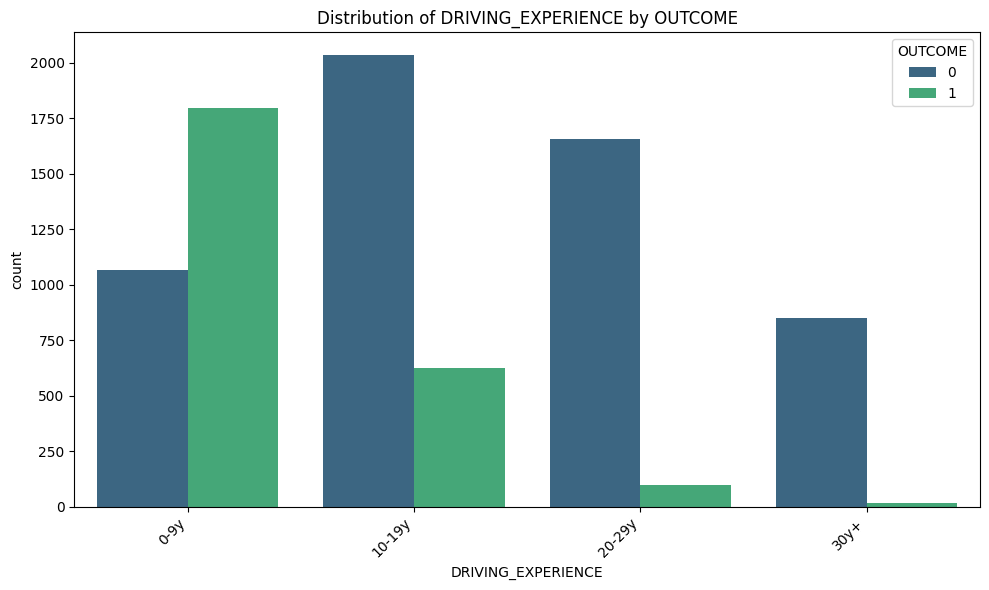

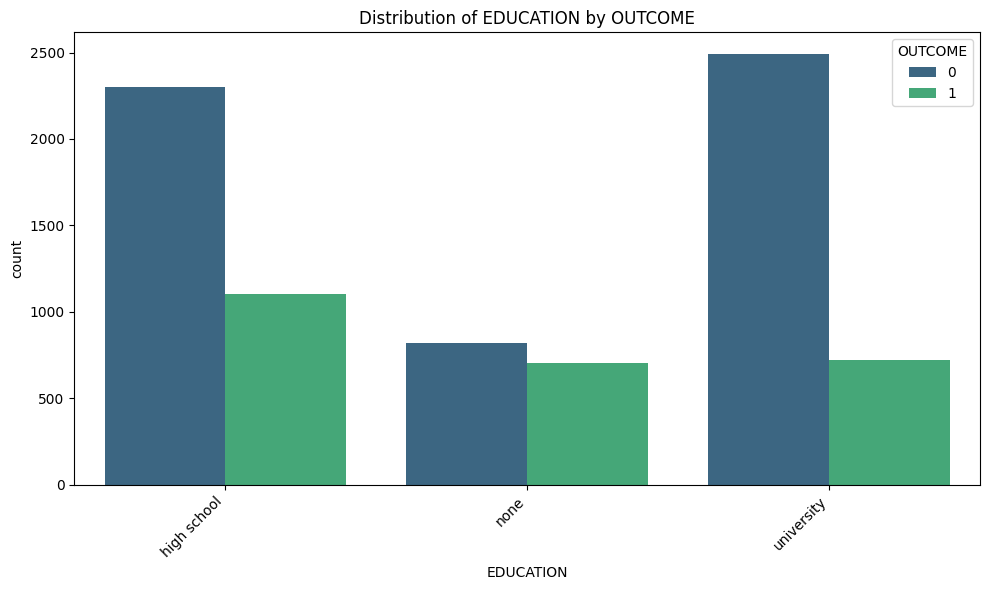

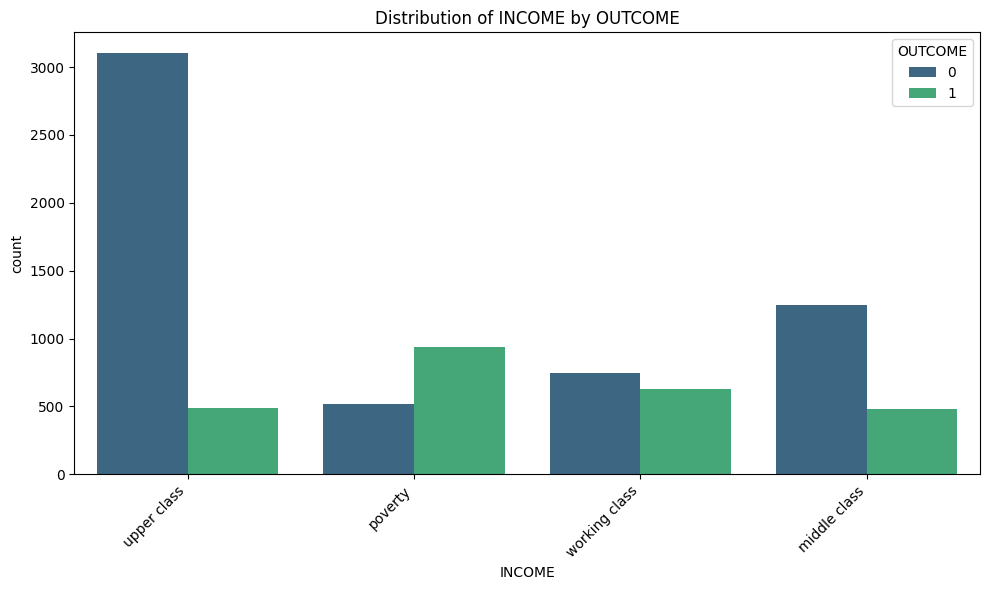

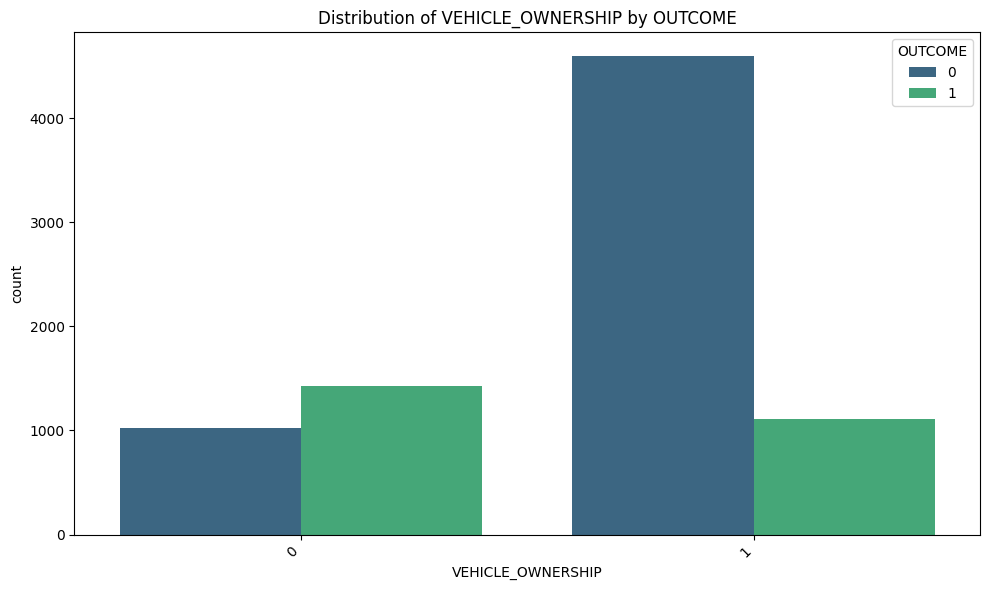

In [ ]:
# categorical_cols = ['AGE', 'RACE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP']

for col in categorical_cols.keys():
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='OUTCOME', palette='viridis')
    plt.title(f'Distribution of {col} by OUTCOME')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In the run: DRIVING_EXPERIENCE top category was '0-9y'higer distrbution; EDUCATION top was high school higer distribution; INCOME top was upper class with higher distribution; VEHICLE_YEAR had most rows before 2015.

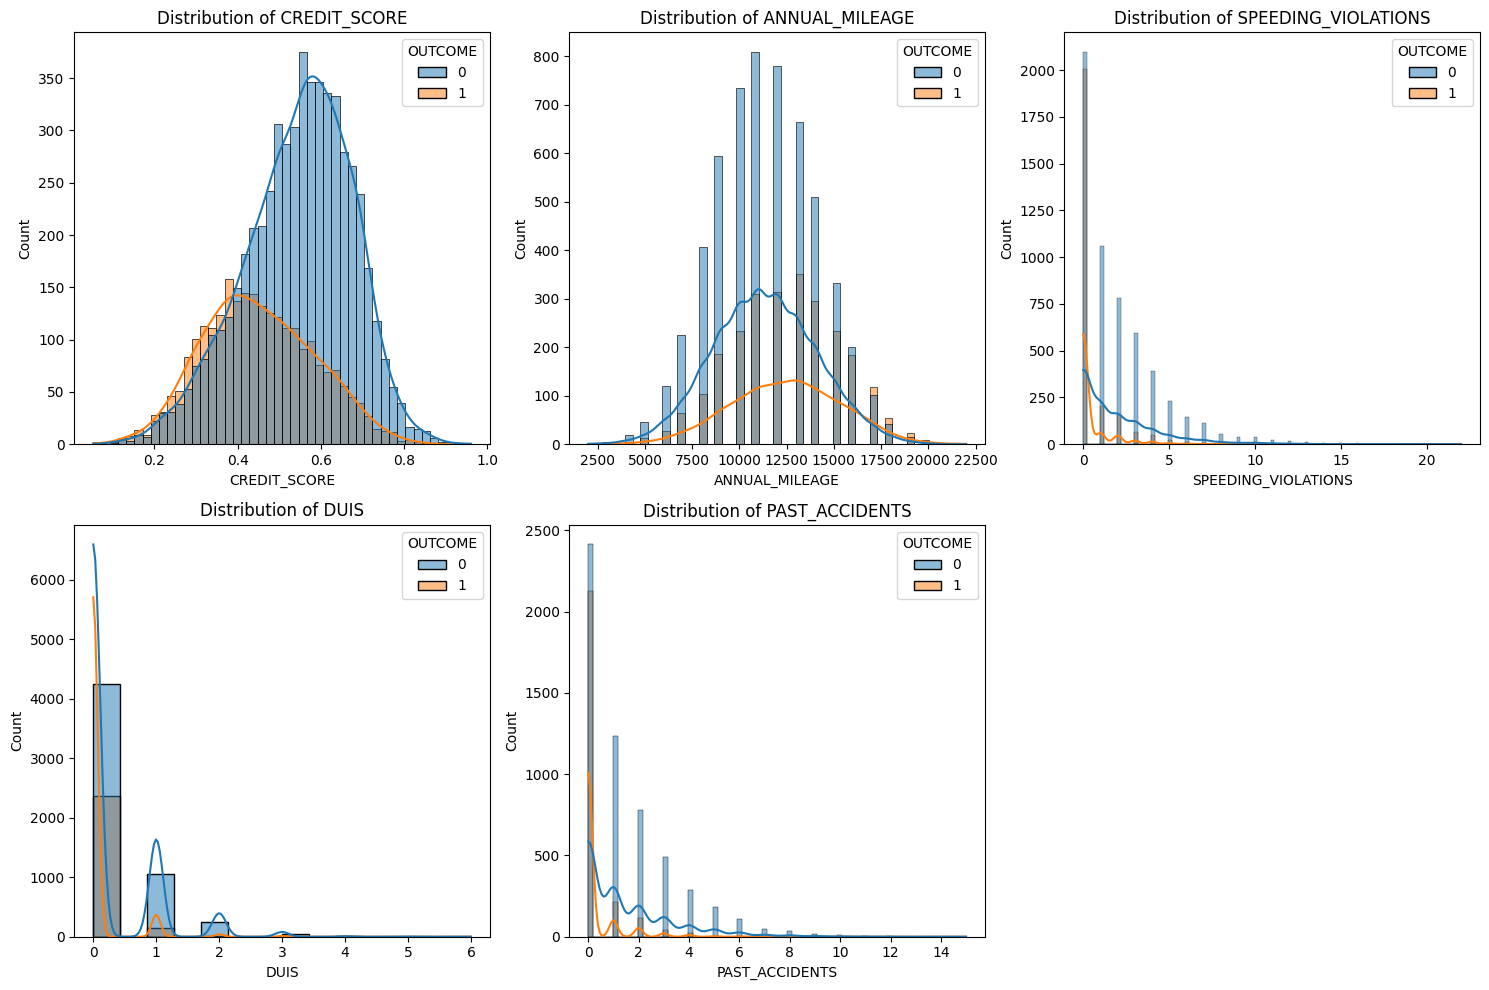

In [ ]:
numerical_cols = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=col, kde=True,hue='OUTCOME')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Feature Engineering and Preprocessing

In [ ]:
df_corr = df.select_dtypes(include=['float64','int64']).drop(columns = ['ID']).corr()
df_corr


,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
CREDIT_SCORE,1.000000,0.312995,0.282555,0.221354,0.007465,-0.174453,0.208433,0.127888,0.182408,-0.321436
VEHICLE_OWNERSHIP,0.312995,1.000000,0.170752,0.116477,-0.010469,-0.093710,0.133302,0.087432,0.121881,-0.386217
MARRIED,0.282555,0.170752,1.000000,0.293613,0.010056,-0.465642,0.216213,0.119750,0.214767,-0.253200
CHILDREN,0.221354,0.116477,0.293613,1.000000,0.019260,-0.451105,0.224753,0.113996,0.204888,-0.230255
POSTAL_CODE,0.007465,-0.010469,0.010056,0.019260,1.000000,-0.130169,0.113228,0.034591,-0.120617,0.095939
ANNUAL_MILEAGE,-0.174453,-0.093710,-0.465642,-0.451105,-0.130169,1.000000,-0.318478,-0.113474,-0.195160,0.184865
SPEEDING_VIOLATIONS,0.208433,0.133302,0.216213,0.224753,0.113228,-0.318478,1.000000,0.365700,0.445531,-0.293138
DUIS,0.127888,0.087432,0.119750,0.113996,0.034591,-0.113474,0.365700,1.000000,0.264834,-0.190015
PAST_ACCIDENTS,0.182408,0.121881,0.214767,0.204888,-0.120617,-0.195160,0.445531,0.264834,1.000000,-0.312738
OUTCOME,-0.321436,-0.386217,-0.253200,-0.230255,0.095939,0.184865,-0.293138,-0.190015,-0.312738,1.000000


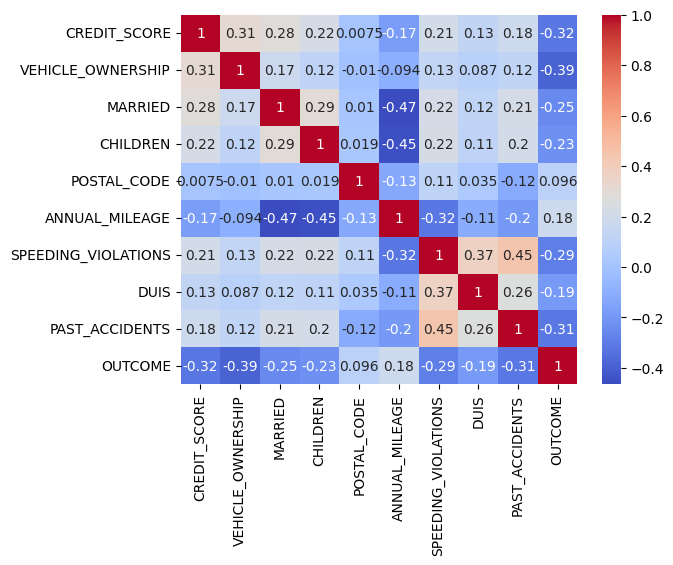

<Figure size 800x600 with 0 Axes>

In [ ]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.figure(figsize=(8,6))
#im = plt.imshow(df_corr.values, aspect='auto')
plt.show()

In [ ]:
df_clean = df.drop(columns = ['ID','RACE','POSTAL_CODE'])

In [ ]:
df_clean.columns

Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

### Data Transformation

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables properly
le = LabelEncoder()

for col in df_clean.select_dtypes(include="object").columns:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))

In [ ]:
df_clean.head()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,1.463619,-0.997671,-1.084100,-1.084299,0.432655,0.818297,0.655859,-1.500166,-1.002088,0.671397,0.108618,-0.223592,-0.661855,-0.431964,-0.639757,0
1,-1.463260,1.002334,-1.084100,0.025466,-0.563870,-1.152059,-1.524718,0.666593,-1.002088,-1.489431,1.525963,-0.223592,-0.661855,-0.431964,-0.639757,1
2,-1.463260,-0.997671,-1.084100,-1.084299,1.429180,-0.168671,0.655859,0.666593,-1.002088,-1.489431,-0.245718,-0.223592,-0.661855,-0.431964,-0.639757,0
3,-1.463260,1.002334,-1.084100,1.135232,1.429180,-2.254245,0.655859,0.666593,-1.002088,0.671397,-0.245718,-0.223592,-0.661855,-0.431964,-0.639757,0
4,-0.487634,1.002334,-0.077339,0.025466,1.429180,-0.929734,0.655859,0.666593,-1.002088,-1.489431,0.108618,-0.223592,0.229183,-0.431964,-0.039345,1


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize scaler
scaler = StandardScaler()

# Select only numeric columns except the target
num_cols = df_clean.select_dtypes(include=[np.number]).columns.drop("OUTCOME")

# Fit and transform the numeric columns
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

####Model Building

In [ ]:
# Prepare X,y and split to keep preprocessing simple
df = df_clean[df_clean['OUTCOME'].notnull()].copy()
X = df_clean.drop(columns=['OUTCOME'])
y = df_clean['OUTCOME'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
print("Train/test shapes:", X_train.shape, X_test.shape)

Train/test shapes: (5704, 15) (2445, 15)


In [ ]:
# Identify low-card and high-card categorical features
num_cols = [c for c in X_train.select_dtypes(include=[np.number]).columns.tolist()]
cat_cols = [c for c in X_train.select_dtypes(include=['object','category']).columns.tolist()]
low_card = [c for c in cat_cols if X_train[c].nunique() <= 20]
high_card = [c for c in cat_cols if c not in low_card]

# For high-card columns convert to codes based on train set (mapping)
for col in high_card:
    mapping = {v:i for i,v in enumerate(pd.Categorical(X_train[col].fillna("MISSING")).categories)}
    X_train[col] = X_train[col].fillna("MISSING").map(mapping).fillna(-1).astype(int)
    X_test[col]  = X_test[col].fillna("MISSING").map(mapping).fillna(-1).astype(int)

# final numeric features (include mapped high-card columns)
numeric_features = [c for c in num_cols if c in X_train.columns] + high_card
cat_low_features = [c for c in low_card if c in X_train.columns]

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

num_transformer = Pipeline([('impute', SimpleImputer(strategy='median')), ('scale', MinMaxScaler())])
cat_transformer = Pipeline([('impute', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

transformers = []
if numeric_features:
    transformers.append(('num', num_transformer, numeric_features))
if cat_low_features:
    transformers.append(('cat', cat_transformer, cat_low_features))

preprocessor = ColumnTransformer(transformers=transformers, remainder='drop', sparse_threshold=0)

# Models to try
pipe_lr = Pipeline([('preproc', preprocessor), ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))])
pipe_rf = Pipeline([('preproc', preprocessor), ('clf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1))])
pipe_rf = Pipeline([('preproc', preprocessor), ('clf', DecisionTreeClassifier(class_weight='balanced', random_state=42))])

print("Fitting Logistic Regression...")
pipe_lr.fit(X_train, y_train)
print("Fitting Random Forest...")
pipe_rf.fit(X_train, y_train)

Fitting Logistic Regression...
Fitting Random Forest...


Pipeline(steps=[('preproc',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['AGE', 'GENDER',
                                                   'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME',
                                                   'CREDIT_SCORE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'VEHICLE_YEAR', 'MARRIED',
                                                   'CHILDREN', 'ANNUAL_MILEAGE',
                                                   'VEHICLE_TYPE',
                                                   'SPEEDING_VIOLATIONS',
                                                   'DUIS',
                                                   'PAST_ACCIDENTS'])])),
                ('clf',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

### Model Evaluation

In [ ]:
def evaluate(pipe, X_t, y_t):
    y_pred = pipe.predict(X_t)
    y_proba = pipe.predict_proba(X_t)[:,1] if hasattr(pipe, "predict_proba") else None
    results = {
        'accuracy': accuracy_score(y_t, y_pred),
        'precision': precision_score(y_t, y_pred, zero_division=0),
        'recall': recall_score(y_t, y_pred, zero_division=0),
        'f1': f1_score(y_t, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_t, y_proba) if y_proba is not None else None,
        'confusion_matrix': confusion_matrix(y_t, y_pred),
        'report': classification_report(y_t, y_pred, zero_division=0)
    }
    return results

res_lr = evaluate(pipe_lr, X_test, y_test)
res_rf = evaluate(pipe_rf, X_test, y_test)

print("Logistic Regression (test):")
for k in ['accuracy','precision','recall','f1','roc_auc']:
    print(f" {k}: {res_lr[k]}")
print(res_lr['report'])

print("Random Forest (test):")
for k in ['accuracy','precision','recall','f1','roc_auc']:
    print(f" {k}: {res_rf[k]}")
print(res_rf['report'])

print("Decision Tree (test):")
for k in ['accuracy','precision','recall','f1','roc_auc']:
    print(f" {k}: {res_rf[k]}")
print(res_rf['report'])


Logistic Regression (test):
 accuracy: 0.8016359918200409
 precision: 0.6355599214145383
 recall: 0.8501971090670171
 f1: 0.7273749297358066
 roc_auc: 0.8982672193419708
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1684
           1       0.64      0.85      0.73       761

    accuracy                           0.80      2445
   macro avg       0.78      0.81      0.79      2445
weighted avg       0.83      0.80      0.81      2445

Random Forest (test):
 accuracy: 0.750920245398773
 precision: 0.5989583333333334
 recall: 0.6044678055190539
 f1: 0.6017004578155657
 roc_auc: 0.7107849716431374
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1684
           1       0.60      0.60      0.60       761

    accuracy                           0.75      2445
   macro avg       0.71      0.71      0.71      2445
weighted avg       0.75      0.75      0.75      2445

Decision Tree

###Logistic Regression

Accuracy: 80%

Precision (positive class): 0.64 → When it predicts a claim, 64% are correct.

Recall (positive class): 0.85 → Captures 85% of actual claims (low false negatives).

F1-score: 0.73 → Balanced trade-off between precision and recall.

ROC-AUC: 0.90 → Strong overall separability between claim vs no-claim.

Interpretation: Excellent at identifying customers who will file a claim (high recall), but may include some false alarms.

###Random Forest

Accuracy: 75%

Precision: 0.60 → Similar to logistic regression but slightly lower.

Recall: 0.60 → Misses 40% of claims (higher false negatives).

F1-score: 0.60 → Weaker balance.

ROC-AUC: 0.71 → Moderate separability.

Interpretation: Not strong at detecting claims — underperforms compared to Logistic Regression.

###Decision Tree

Metrics almost identical to Random Forest (accuracy 75%, recall 0.60, ROC-AUC 0.71).

Interpretation: Simpler model but same weaknesses — struggles with claim detection.

### Confusion matrix heatmap + compute Specificity (True Negative Rate)

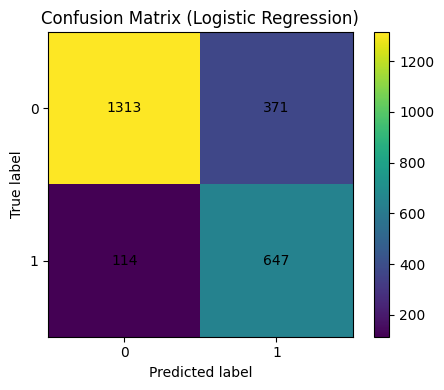

Confusion matrix values: TN= 1313 FP= 371 FN= 114 TP= 647
Specificity (True Negative Rate) = TN / (TN + FP) = 0.7797


In [ ]:
# choose best model by F1 or choose business metric recall
best = pipe_lr if res_lr['f1'] >= res_rf['f1'] else pipe_rf
best_name = "Logistic Regression" if res_lr['f1'] >= res_rf['f1'] else "Random Forest"
res_best = res_lr if res_lr['f1'] >= res_rf['f1'] else res_rf

cm = res_best['confusion_matrix']
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else None

# Plot heatmap
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest')
plt.colorbar()
plt.title(f"Confusion Matrix ({best_name})")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0,1], ['0','1'])
plt.yticks([0,1], ['0','1'])
for (i,j), val in __import__('numpy').ndenumerate(cm):
    plt.text(j, i, int(val), ha='center', va='center')
plt.tight_layout()
plt.show()

print("Confusion matrix values: TN=", tn, "FP=", fp, "FN=", fn, "TP=", tp)
print(f"Specificity (True Negative Rate) = TN / (TN + FP) = {specificity:.4f}")

TN (True Negatives) = 1313 → Customers who did not file a claim and were correctly predicted as "no claim".

FP (False Positives) = 371 → Customers who were predicted as "will file a claim" but actually did not.

FN (False Negatives) = 114 → Customers who were predicted as "no claim" but actually filed a claim.

TP (True Positives) = 647 → Customers who filed a claim and were correctly predicted as such.

Specificity=
TN+FP
TN=1313+371 / 1313≈77.98%

This means the model is about 78% accurate in recognizing non-claim customers.